In [1]:
using Plots
using LinearAlgebra
using Printf
using LaTeXStrings
using DifferentialEquations

In [2]:
default(lw=2, markersize=6,
    xtickfont=font(12), ytickfont=font(12),
    guidefont=font(14), legendfont=font(12), titlefont=font(12))

Solve the heat equation
$$
u_t = \kappa u_{xx},
$$
with periodic boundary conditions using finite differences.

Δt = (0.99 * Δx ^ 2) / (2κ) = 0.019800000000000005


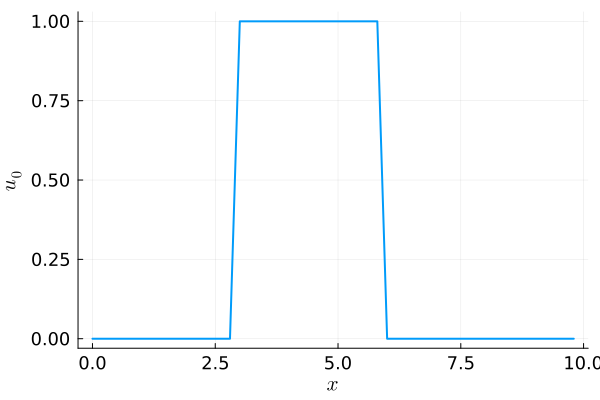

In [11]:
L = 10;
κ = 1.0;

N = 50;
x = LinRange(0, L, N + 1)[1:end-1];
Δx = x[2] - x[1];
# @show Δt = Δx;
# @show Δt = 0.1 * Δx^2;
@show Δt = .99 * Δx^2/(2*κ);
n_steps = 5000;

# u0 = @. exp(-(x - L / 2)^2);
u0 = @. Float64((x>3)*(x<6))
plot(x, u0, label="")
xlabel!(L"$x$")
ylabel!(L"$u_0$")

In [ ]:
function integrate_heat_equation1(u0, κ, Δx, Δt, n_steps)
    u = deepcopy(u0)
    t = 0.0

    u_traj = [deepcopy(u)]
    t_traj = Float64[t]

    u_new = similar(u)

    N = length(u)

    for n in 1:n_steps
        # update u with periodic boundary conditions
        u_new[1] = u[1] + κ * Δt / Δx^2 * (u[2] - 2 * u[1] + u[end])
        for j in 2:N-1
            u_new[j] = u[j] + κ * Δt / Δx^2 * (u[j+1]- 2*u[j] + u[j-1])
        end
        u_new[end] = u[end] + κ * Δt / Δx^2 * (u[1] - 2 * u[end] + u[end-1])
        # copy over
        @. u = u_new

        t += Δt

        push!(u_traj, deepcopy(u))
        push!(t_traj, t)
    end

    return t_traj, u_traj

end

In [ ]:
t_traj, u_traj = integrate_heat_equation1(u0, κ, Δx, Δt, n_steps);

In [ ]:
anim = @animate for (n, t) in enumerate(t_traj[1:100:end])
    plot(x, u_traj[n], label="")
    title!(@sprintf("t = %.2f", t))
    xlabel!(L"$x$")
    # ylims!(0,1.5)
end

In [ ]:
gif(anim, fps=15)


In [4]:
function fheat!(du, u, p, t)
    κ = p[1]
    Δx = p[2]
    N = length(u)

    du[1] = κ / Δx^2 * (u[2] - 2 * u[1] + u[end])
    for j in 2:N-1
        du[j] = κ / Δx^2 * (u[j+1] - 2 * u[j] + u[j-1])
    end
    du[end] =κ / Δx^2 * (u[1] - 2 * u[end] + u[end-1])

    du
end

fheat! (generic function with 1 method)

In [5]:
p = [κ, Δx]
tspan = (0., 10.);
prob = ODEProblem(fheat!, u0, tspan, p);


In [12]:
# t_vals = 0:0.1:10;

# sol = solve(prob, saveat=t_vals);
sol = solve(prob, dt = Δt, Euler(), adaptive=false); # exactly forward euler with fixed time step

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


In [15]:
anim = @animate for (t, u) in zip(sol.t, sol.u)
    plot(x, u, label="")
    title!(@sprintf("t = %.2f", t))
    xlabel!(L"$x$")
    ylims!(0, 1.5)
end

Animation("/var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_dmEC5q", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000498.png", "000499.png", "000500.png", "000501.png", "000502.png", "000503.png", "000504.png", "000505.png", "000506.png", "000507.png"])

[ Info: Saved animation to /Users/grs53/code/Math_540_2023/lectures/tmp.gif


Plots.AnimatedGif("/Users/grs53/code/Math_540_2023/lectures/tmp.gif")
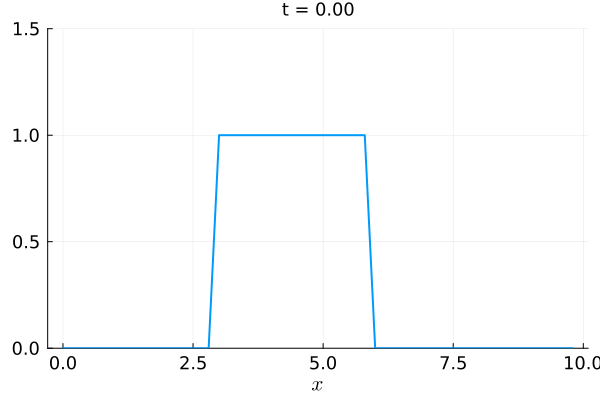

In [16]:
gif(anim, fps=6)


In [17]:
function fheat_dirichlet!(du, u, p, t)
    κ = p[1]
    Δx = p[2]
    N = length(u)

    du[1] = κ / Δx^2 * (u[2] - 2 * u[1] + 0)
    for j in 2:N-1
        du[j] = κ / Δx^2 * (u[j+1] - 2 * u[j] + u[j-1])
    end
    du[end] =κ / Δx^2 * (0 - 2 * u[end] + u[end-1])

    du
end

fheat_dirichlet! (generic function with 1 method)

In [21]:
p = [κ, Δx]
tspan = (0., 10.);
prob_dirichlet = ODEProblem(fheat_dirichlet!, u0, tspan, p);
# sol = solve(prob_dirichlet, dt = Δt, Euler(), adaptive=false); # exactly forward euler with fixed time step
sol = solve(prob_dirichlet)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 54-element Vector{Float64}:
  0.0
  0.00010943502181638245
  0.0009380201732471649
  0.0025088996356634175
  0.004562648735144109
  0.0072034603687572765
  0.010514256481114908
  0.014684208723401525
  0.01992125204023607
  0.026551983661858805
  0.034822105081018594
  0.04499915669321258
  0.05752724032947909
  ⋮
  2.0858766424666793
  2.4176593967797957
  2.789094644050963
  3.211282019294839
  3.683812100557209
  4.2240587658790725
  4.840265464600978
  5.558118597774994
  6.404001346578696
  7.422470188298856
  8.658593634711309
 10.0
u: 54-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.00599724271607e-19  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 6.796028035931752e-32, 1.620603490

[ Info: Saved animation to /Users/grs53/code/Math_540_2023/lectures/tmp.gif


Plots.AnimatedGif("/Users/grs53/code/Math_540_2023/lectures/tmp.gif")
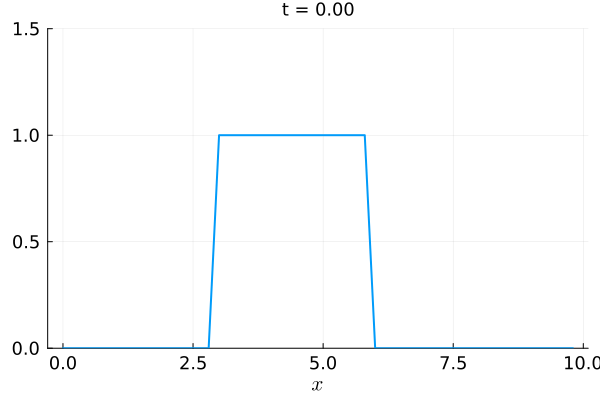

In [22]:
anim = @animate for (t, u) in zip(sol.t, sol.u)
    plot(x, u, label="")
    title!(@sprintf("t = %.2f", t))
    xlabel!(L"$x$")
    ylims!(0, 1.5)
end
gif(anim, fps=6)


In [24]:
dt = 0.5

soln = solve(prob,  dt = dt, ImplicitEuler(), adaptive=false); # integrate with backwards Euler and fixed time step
# plot(soln)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


In [25]:
anim = @animate for (t, u) in zip(soln.t, soln.u)
    plot(x, u, label="")
    title!(@sprintf("t = %.2f", t))
    xlabel!(L"$x$")
    ylims!(0, 1.5)
end

Animation("/var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_xE6CLu", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png", "000021.png"])

[ Info: Saved animation to /Users/grs53/code/Math_540_2023/lectures/tmp.gif


Plots.AnimatedGif("/Users/grs53/code/Math_540_2023/lectures/tmp.gif")
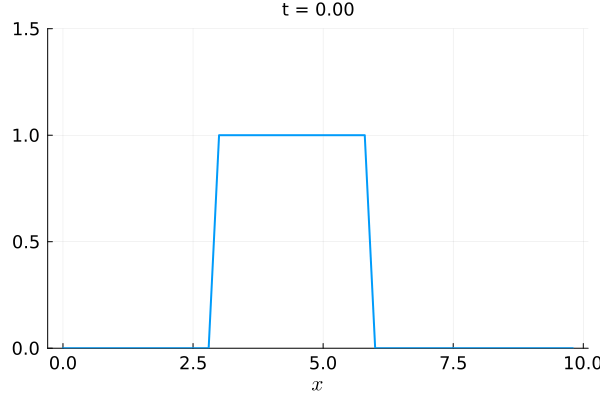

In [26]:
gif(anim, fps=6)
